In [1]:
# 加入plot支持
%matplotlib inline

# 把当前路径的上级路径作为root
import os
import sys
cur_dir = os.getcwd()
pkg_rootdir = os.path.dirname(cur_dir)
sys.path.append(pkg_rootdir)
os.chdir(pkg_rootdir)
print("当前工作路径：",pkg_rootdir)

当前工作路径： /Users/piginzoo/workspaces/mlstock


In [3]:
from mlstock.data import data_filter, data_loader
from mlstock.data.datasource import DataSource
from mlstock.utils import utils
import logging
import pandas as pd
import numpy as np
import math

In [4]:
start_date='20180101'
end_date='20220101'

In [5]:
datasource = DataSource()

In [7]:
df=datasource.index_daily(start_date=start_date,end_date=end_date,index_code='000001.SH')

In [9]:
import statsmodels.tsa.stattools as ts

In [21]:
result = ts.adfuller(df.pct_chg, maxlag=int(pow(len(df)-1,(1/3))), regression='ct', autolag=None)

In [22]:
result
# https://www.itbook5.com/2019/08/11560/ 
# (-29.178269124705384, <--- 检测统计量小于临界值就是平稳的，-29.2 < -3.95,-3.41,-3.1, 所以平稳，
#  0.0,<--P-value，概率，原假设是不平稳的，如果很小，说明无法否认（概率很小嘛），但是如果概率很大，说明不应该发生的发生了，就要否定原假设了
#  27,
#  21809,
#  {'1%': -3.9591851682232386, <-- crital value , 检验统计量大于临界值时，否决原假设失败(这意味着序列不是平稳的)
#   '5%': -3.4106913303874435,
#   '10%': -3.127168564813546})
# 返回
# adf （float）          测试统计
# pvalue （float）
# MacKinnon             基于MacKinnon的近似p值（1994年，2010年）
# usedlag （int）        使用的滞后数量
# nobs（ int）           用于ADF回归的观察数和临界值的计算
# critical values（dict）测试统计数据的临界值为1％，5％和10％。基于MacKinnon（2010）
# icbest（float）        如果autolag不是None，则最大化信息标准。
# resstore （ResultStore，可选）一个虚拟类，其结果作为属性附加


(-10.298346774575084,
 5.486510560611043e-16,
 9,
 963,
 {'1%': -3.968201739263928,
  '5%': -3.4150588806907947,
  '10%': -3.129739200350535})

In [15]:
import random

import matplotlib
import matplotlib.pyplot as plt
import talib as ta
from matplotlib.font_manager import FontProperties
from statsmodels.graphics.tsaplots import plot_acf

def test_stationarity(x, fig):
    font = FontProperties()

    ax = fig.add_subplot(421)
    ax.set_ylabel("return", fontproperties=font, fontsize=16)
    ax.set_yticklabels([str(x * 100) + "0%" for x in ax.get_yticks()], fontproperties=font, fontsize=14)
    ax.set_title("data stationarity", fontproperties=font, fontsize=16)
    ax.grid()
    plt.plot(x)

    ax = fig.add_subplot(422)
    plot_acf(x, ax=ax, lags=50)

    from pandas.plotting import autocorrelation_plot
    ax = fig.add_subplot(423)
    autocorrelation_plot(x, ax=ax)


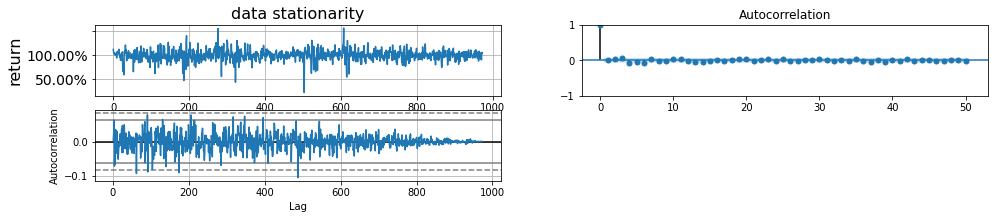

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(16, 6))
test_stationarity(df.pct_chg,fig)


0      1.2444
1      0.6207
2      0.4928
3      0.1784
4      0.5227
        ...  
968   -0.0575
969    0.3910
970   -0.9121
971    0.6169
972    0.5688
Name: pct_chg, Length: 973, dtype: float64